In [46]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [47]:
#Load the model
model=keras.models.load_model('deeplabv3plus.h5',compile=False)

In [48]:
#Load and preprocess the input image
image_url = "https://upload.wikimedia.org/wikipedia/commons/6/6e/Golde33443.jpg"  # Change this line

image_path = tf.keras.utils.get_file("sample.jpg", origin=image_url)
img_raw=tf.io.read_file(image_path)
img=tf.image.decode_jpeg(img_raw,channels=3)
original_size=tf.shape(img)[:2]
img=tf.image.convert_image_dtype(img,dtype=tf.uint8)
img_resized=tf.image.resize(img,[512,512])
img_tensor=tf.expand_dims(img_resized,0)

In [49]:
#Run the model
result = model(img_tensor)  # returns a tensor of shape [1, 513, 513, 21]
segmentation_map = tf.argmax(result, axis=3)[0]

In [50]:
#Define colormap
def create_pascal_label_colormap():
    colormap = np.zeros((256, 3), dtype=int)
    for i in range(256):
        r, g, b = 0, 0, 0
        c = i
        for j in range(8):
            r |= (c & 1) << (7 - j)
            g |= ((c >> 1) & 1) << (7 - j)
            b |= ((c >> 2) & 1) << (7 - j)
            c >>= 3
        colormap[i] = [r, g, b]
    return colormap

In [51]:
#Convert class map to color map
colormap = create_pascal_label_colormap()
segmentation_color = tf.gather(colormap, segmentation_map)
segmentation_color = tf.cast(segmentation_color, tf.uint8)

In [52]:
# Resize to original image size
segmentation_color = tf.image.resize(segmentation_color, original_size, method='nearest')

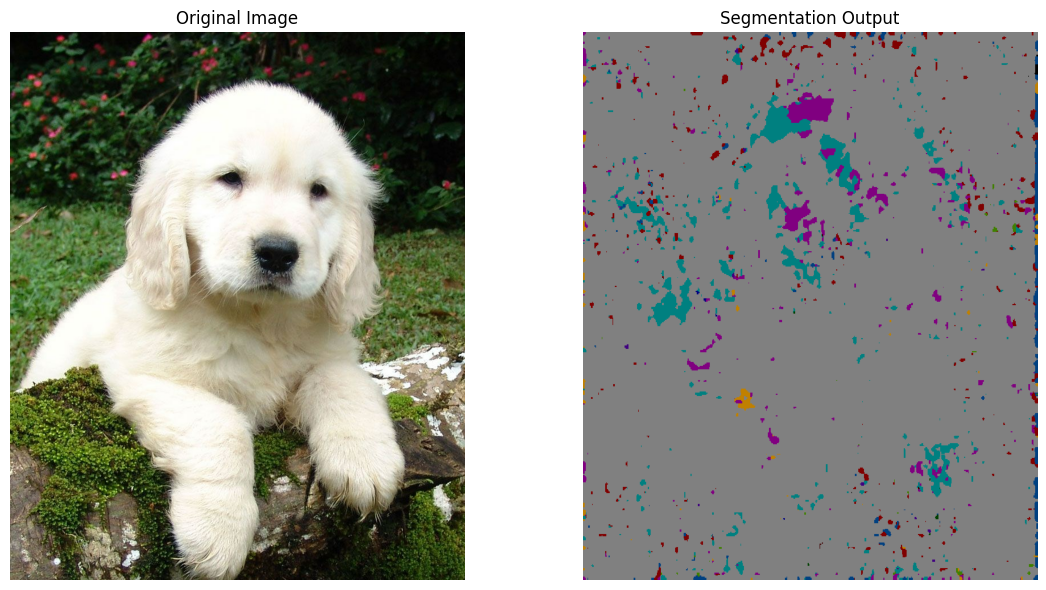

In [53]:
#Display
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(tf.image.decode_jpeg(img_raw))
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmentation_color)
plt.title("Segmentation Output")
plt.axis('off')

plt.tight_layout()
plt.show()
